# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
    
import lut

--2020-10-14 12:45:37--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 10330 (10K) [text/plain]
Zapis do: `lut.py.3'

lut.py.3            100%[===================>]  10,09K  --.-KB/s     w 0s      

2020-10-14 12:45:37 (27,9 MB/s) - zapisano `lut.py.3' [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

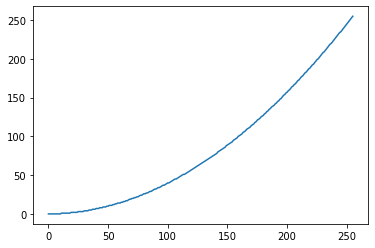

In [6]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

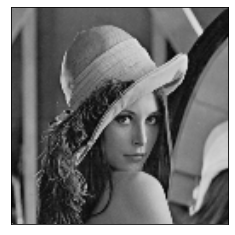

In [7]:
import os

if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread('lena.bmp')
plt.xticks([]), plt.yticks([])
plt.imshow(I)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

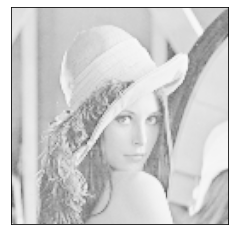

In [8]:
I_LUT = cv2.LUT(I,lut.log)
plt.xticks([]), plt.yticks([])
plt.imshow(I_LUT)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [9]:
def LUT(image, coding_table):
    image2 = cv2.LUT(image,coding_table)
    fl, (ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.set_title('Wykres przekodowania')
    ax1.plot(coding_table)
    ax2.set_title('Obraz orginalny')
    ax2.imshow(image)
    ax3.set_title('Obraz przeksztalcony')
    ax3.imshow(image2)
    ax1.set_aspect('equal')
    

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

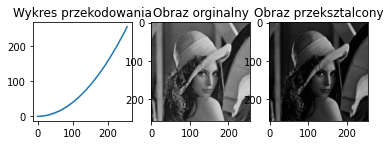

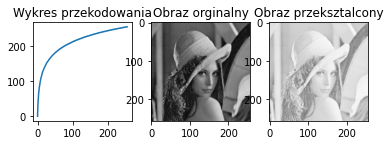

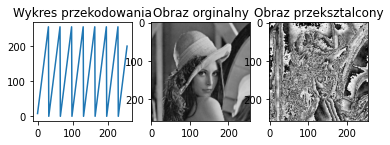

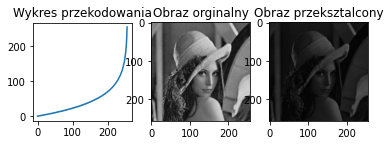

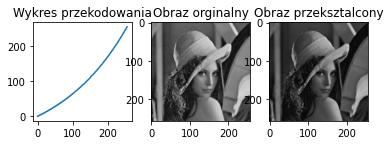

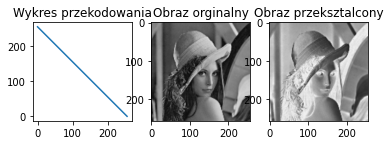

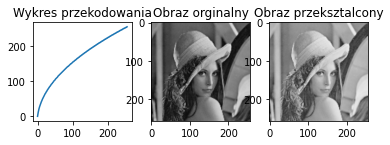

In [10]:
LUT(I,lut.kwadratowa)
LUT(I,lut.log)
LUT(I,lut.pila)
LUT(I,lut.odwlog)
LUT(I,lut.wykladnicza)
LUT(I,lut.odwrotna)
LUT(I,lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

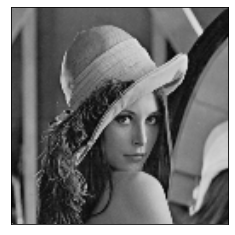

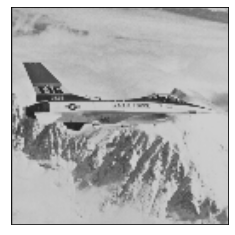

In [11]:
if not os.path.exists("lena.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if not os.path.exists("jet.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

lena = cv2.imread('lena.bmp')
jet = cv2.imread('jet.bmp')


plt.imshow(lena)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(jet)
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

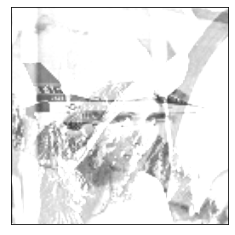

In [12]:
image_add = cv2.add(lena,jet)

plt.imshow(image_add)
plt.xticks([]), plt.yticks([])
plt.show()



Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

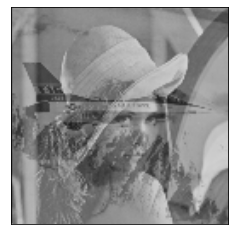

In [13]:
# niekorzystnie może wpływać to że po dodaniu obrazów nowy obraz wychodzi poza zakres 0-255
# bo mamy typ uint8

image_add_fixed = cv2.add(lena.astype('uint16'),jet.astype('uint16'))

plt.imshow((image_add_fixed/2).astype('uint8'))
# (image_add_fixed -image_add_fixed.min())*(1/image_add_fixed.max()-image_add_fixed.min())
plt.xticks([]), plt.yticks([])
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

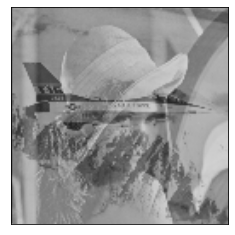

In [14]:
dest = cv2.addWeighted(lena,0.4,jet,0.6,1)

plt.imshow(dest)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

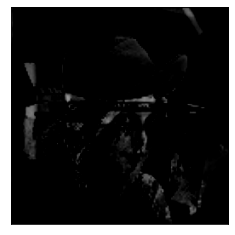

In [15]:
image_subtract = cv2.subtract(lena, jet)

plt.imshow(image_subtract)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

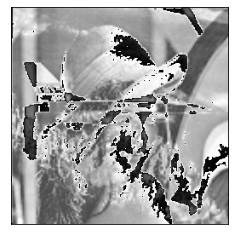

In [16]:
image_subtract_fixed = cv2.subtract(lena.astype('int16'),jet.astype('int16'))
np.abs(image_subtract_fixed);

plt.imshow(image_subtract_fixed.astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.show()


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

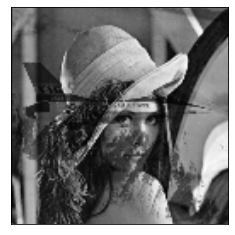

In [17]:


image_multiplyF64 = cv2.multiply(lena.astype('float64'),jet.astype('float64'))
image_multiply = image_multiplyF64/image_multiplyF64.max()*255
plt.imshow(image_multiply.astype('uint8'))
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

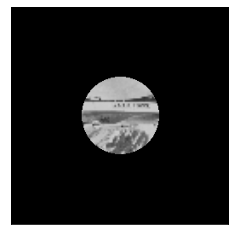

In [19]:
if not os.path.exists ("kolo.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
        
kolo = cv2.imread('kolo.bmp')

multiply = cv2.multiply(jet,(kolo).astype('bool').astype('uint8'))

plt.imshow(multiply)
plt.xticks([]), plt.yticks([])
plt.show()




### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

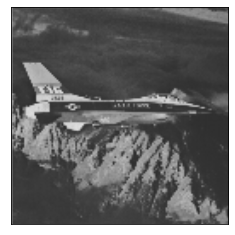

In [20]:
negative = cv2.bitwise_not(jet)

plt.imshow(negative)
plt.xticks([]), plt.yticks([])
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

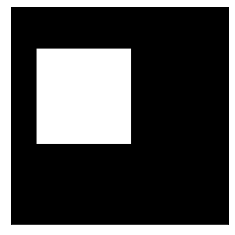

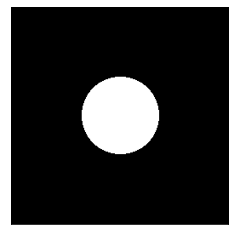

In [21]:
if not os.path.exists("kwadrat.bmp"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
        
kwadrat = cv2.imread('kwadrat.bmp')

plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

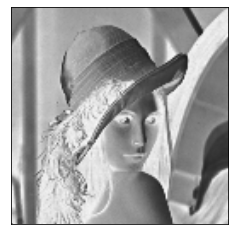

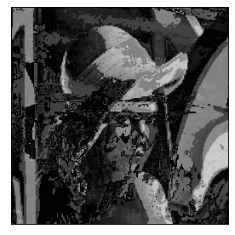

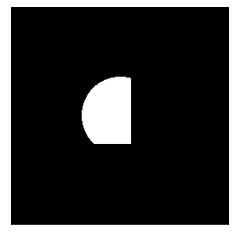

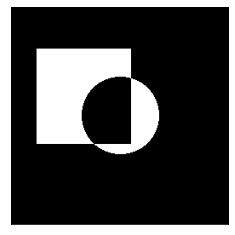

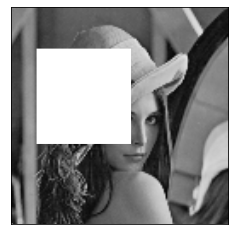

In [22]:
plt.imshow(~lena)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(lena&jet)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(kolo&kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(kolo^kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(lena|kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()
